<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/DL/18BCE247_DL6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Urvashi Ramdasani

Division : EL3

Aim : CIFAR10 image classification using Transfer Learning (Using generators)

In [ ]:
# Load the libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, GlobalAveragePooling2D, Dropout
import keras
from sklearn import metrics
from keras.utils import np_utils
from keras.datasets import cifar10
import random
from keras.applications import Xception, ResNet50
from keras.applications.xception import preprocess_input
import cv2

In [ ]:
# Load the data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000, 1)
X_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000, 1)


In [ ]:
# Class labels

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

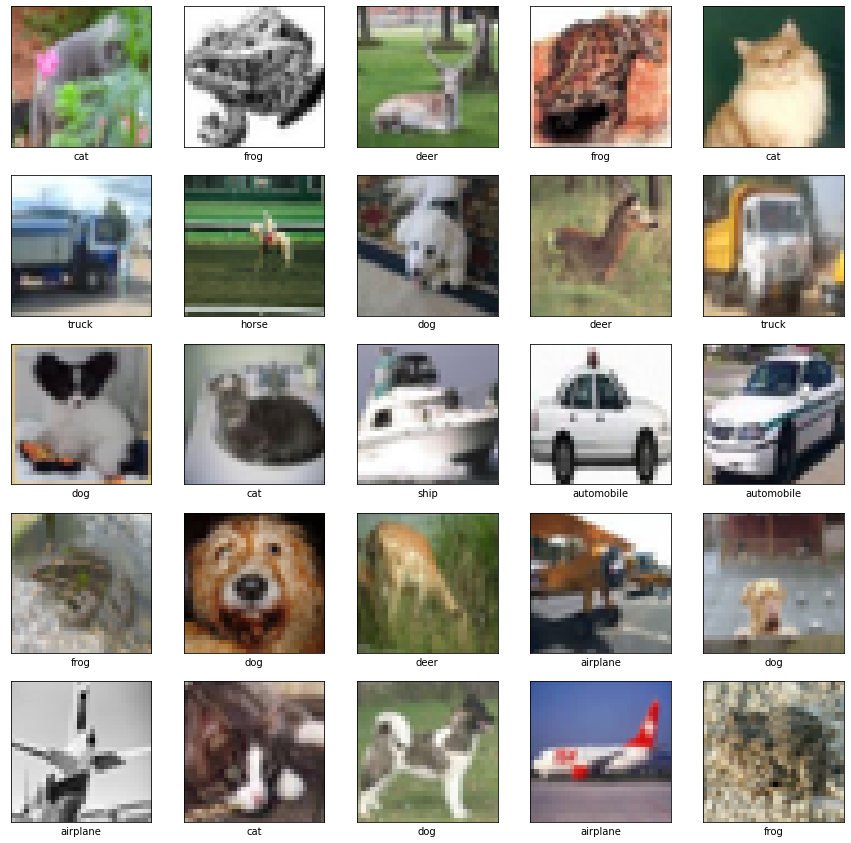

In [ ]:
# Plotting random images

plt.figure(figsize = (15, 15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0, len(X_train))
  plt.imshow(X_train[rand_no])
  plt.xlabel(class_names[int(y_train[rand_no])])

In [ ]:
# One Hot Encoding

y_train = np_utils.to_categorical(y_train)
y_test_tmp = y_test
y_test = np_utils.to_categorical(y_test)

In [ ]:
batch_size = 200
input_size = (299, 299, 3)
epochs = 1

In [ ]:
# Load pretrained Xception model without top

pretrained_model = Xception(include_top = False, weights = 'imagenet', input_shape = input_size)

In [ ]:
# Define data generator

def myGenerator(x, y, nr, nc, batch_size, me):
  print('In Generator ', me)
  while 1:
    print('In while ', me)
    for i in range(0, x.shape[0] // batch_size):
      print('In for ', i, me)
      ip = x[i * batch_size:(i + 1) * batch_size]
      op = y[i * batch_size:(i + 1) * batch_size]
      tmp = keras.applications.xception.preprocess_input(np.array(
          [cv2.resize(ip[i], dsize = (nr, nc), interpolation = cv2.INTER_CUBIC) for i in range(batch_size)]).astype('float32'))
      tmp = pretrained_model.predict(tmp)
      yield tmp, op

In [ ]:
train_batch_gen = myGenerator(X_train, y_train, input_size[0], input_size[1], batch_size, 'training generator')
val_batch_gen = myGenerator(X_test, y_test, input_size[0], input_size[1], batch_size, 'validation generator')

In [ ]:
# Classifier on top

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape = pretrained_model.output_shape[1:])) # 
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

# Compile the model

optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = optimizer, metrics = ['accuracy'], loss = 'categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(generator = train_batch_gen, steps_per_epoch = X_train.shape[0] // batch_size, epochs = epochs, verbose = 1,
                    validation_data = val_batch_gen, validation_steps = X_test.shape[0] // batch_size)

In Generator  training generator
In while  training generator
In for  0 training generator


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


In for  1 training generator
  8/250 [..............................] - ETA: 8:16 - loss: 1.6242 - accuracy: 0.4576
In for  9 training generator
 45/250 [====>.........................] - ETA: 7:12 - loss: 0.8644 - accuracy: 0.7138
In for  46 training generator
 51/250 [=====>........................] - ETA: 7:00 - loss: 0.8267 - accuracy: 0.7261
In for  52 training generator
 53/250 [=====>........................] - ETA: 6:56 - loss: 0.8156 - accuracy: 0.7298 53 training generator
In for  54 training generator
 58/250 [=====>........................] - ETA: 6:46 - loss: 0.7902 - accuracy: 0.7382
In for  59 training generator
 66/250 [======>.......................] - ETA: 6:29 - loss: 0.7556 - accuracy: 0.7496
In for  67 training generator
106/250 [===========>..................] - ETA: 5:05 - loss: 0.6458 - accuracy: 0.7858training generator
In for  107 training generator
109/250 [============>.................] - ETA: 4:59 - loss: 0.6400 - accuracy: 0.7877training generator
In for 

Remarks:
1. Using Xception : Works best with Adam optimizer of learning rate 0.01 and batch size 200.
2. Resnet : Adam optimizer 0.03 learning rate and batch size 200.